In [6]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


class KMeans:

    def __init__(self,k=3,max_iters=100,tol=1e-4):
        self.k=k
        self.max_iters=max_iters
        self.tol=tol
        self.centroids=None
        self.labels=None

    def fit(self,X):

        np.random.seed(42)
        indices=np.random.choice(len(X),self.k,replace=False)#chose same number of centroids as k form len(X) datapoints
        self.centroids=X[indices]

        for iterations in range(self.max_iters):

            distances=np.sqrt(((X-self.centroids[:,np.newaxis])**2).sum(axis=2))
            self.labels=np.argmin(distances,axis=0)

            new_centroids=np.array([X[self.labels==i].mean(axis=0)
                                    for i in range(self.k)])
            
            if np.all(np.abs(new_centroids-self.centroids<self.tol)):
                break

            self.centroids=new_centroids

        return self
    

    def predict(self,X):
        distances=np.sqrt(((X-self.centroids[:,np.newaxis])**2).sum(axis=2))
        return np.argmin(distances,axis=0)
    
    def inertia(self,X):
        return sum([((X[self.labels==i]-self.centroids[i])**2).sum()
                   for i in range(self.k)])
    

class KMeansPlusPlus(KMeans):
        
    def fit(self,X):

        np.random.seed(42)
        self.centroids=[X[np.random.randint(len(X))]]

        for _ in range(1,self.k):
            distances=np.array([min([np.linalg.norm(x-c)**2
                                     for c in self.centroids])
                                     for x in X])
            probablities=distances/distances.sum()
            cumulative_probs=probablities.cumsum()

            r=np.random.rand()

            for idx,cum_prob in enumerate(cumulative_probs):
                if r < cum_prob:
                    self.centroids.append(X[idx])
                    break
        
        self.centroids=np.array(self.centroids)

        return super().fit(X) # continuse with standard K means


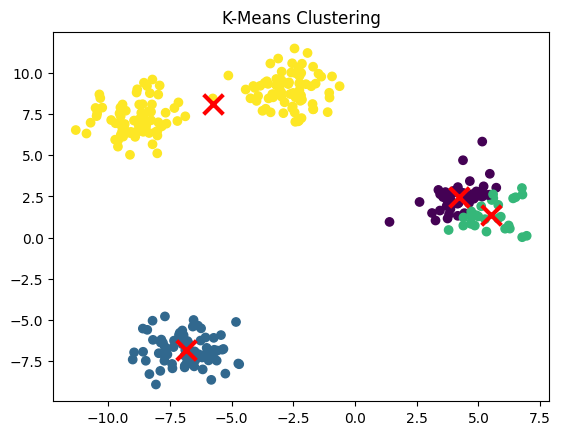

In [3]:

    

X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(k=4)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='x', s=200, linewidths=3)
plt.title('K-Means Clustering')
plt.show()


In [7]:
kmeans_random=KMeans(k=4)
kmeans_pp=KMeansPlusPlus(k=4)


X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans_random.fit(X)
kmeans_pp.fit(X)

print(f"Random Init Inertia: {kmeans_random.inertia(X):.2f}")
print(f"K-Means++ Inertia: {kmeans_pp.inertia(X):.2f}")

Random Init Inertia: 2058.54
K-Means++ Inertia: 2058.54


Random Init Inertia: 1744.92
K-Means++ Inertia: 1744.92


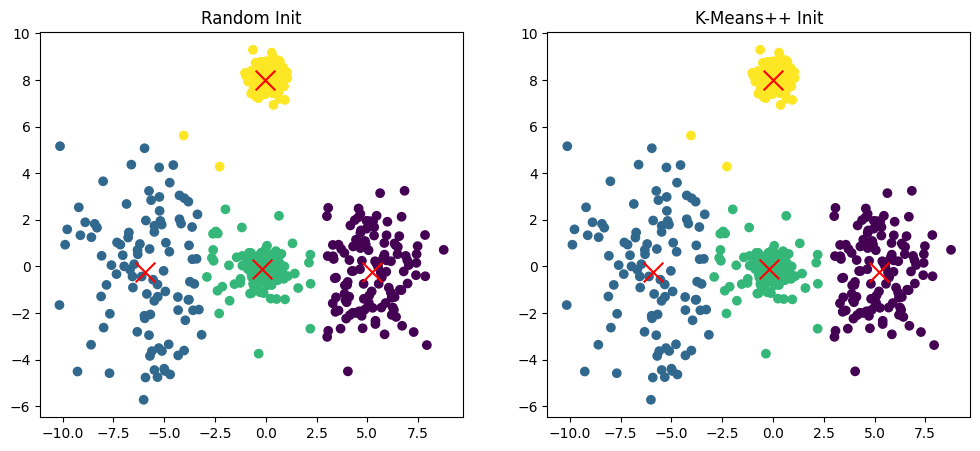

In [10]:

# Custom dataset: overlapping blobs
X, _ = make_blobs(
    n_samples=500,
    centers=[[-5,0],[0,0],[5,0],[0,8]],
    cluster_std=[2.5,0.5,1.5,0.5],  # uneven spreads
    random_state=7
)
# Run both initializations
kmeans_random = KMeans(k=4)
kmeans_pp = KMeansPlusPlus(k=4)

kmeans_random.fit(X)
kmeans_pp.fit(X)

print(f"Random Init Inertia: {kmeans_random.inertia(X):.2f}")
print(f"K-Means++ Inertia: {kmeans_pp.inertia(X):.2f}")

# Plot results
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].scatter(X[:,0], X[:,1], c=kmeans_random.labels, cmap='viridis')
axes[0].scatter(kmeans_random.centroids[:,0], kmeans_random.centroids[:,1], c='red', marker='x', s=200)
axes[0].set_title("Random Init")

axes[1].scatter(X[:,0], X[:,1], c=kmeans_pp.labels, cmap='viridis')
axes[1].scatter(kmeans_pp.centroids[:,0], kmeans_pp.centroids[:,1], c='red', marker='x', s=200)
axes[1].set_title("K-Means++ Init")

plt.show()

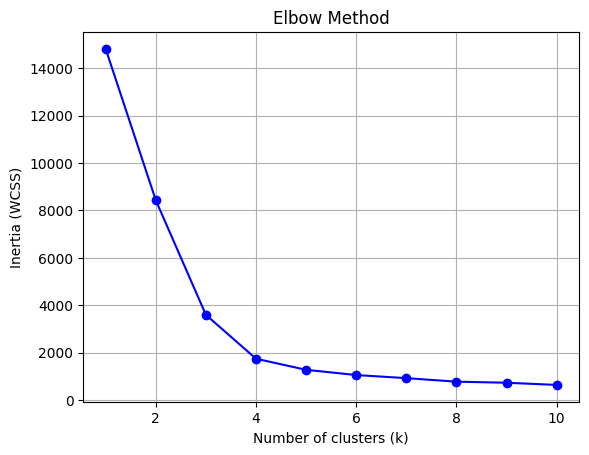

In [ ]:
# Finding optimal k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeansPlusPlus(k=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia(X))

plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

k=2: Silhouette Score = 0.518
k=3: Silhouette Score = 0.603
k=4: Silhouette Score = 0.647
k=5: Silhouette Score = 0.652
k=6: Silhouette Score = 0.617
k=7: Silhouette Score = 0.589
k=8: Silhouette Score = 0.599
k=9: Silhouette Score = 0.589
k=10: Silhouette Score = 0.585


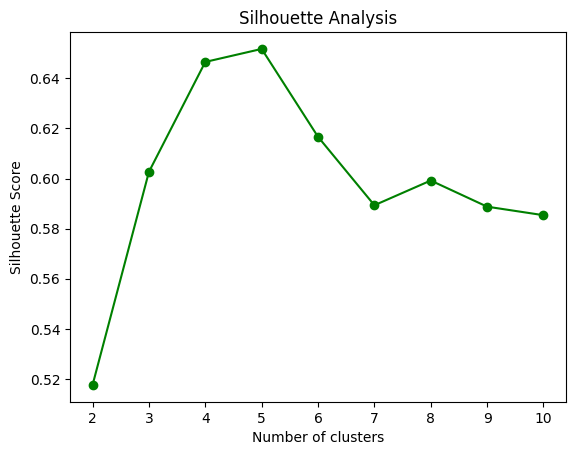

In [12]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeansPlusPlus(k=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.3f}")

plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()